##     Servo Prediction using Linear Regression

Servo Machanism Explaination

A servo mechanism is a control system that automatically maintains or achieves a particular condition, much like a car's cruise control system. When you set your car's cruise control to a specific speed, it acts as a servo mechanism. It continually monitors the car's actual speed and makes adjustments to the engine's power to keep the car cruising at the desired speed, even when facing changes like going uphill or downhill. Just as cruise control maintains a constant speed, servo mechanisms in various applications utilize sensors and automatic adjustments to uphold specific conditions or positions, playing a crucial role in control and automation processes.

Objecive

The objective of the project on "Servo Prediction using Linear Regression" is to develop a predictive model that can forecast the behavior of servo mechanisms based on historical data. By utilizing linear regression techniques, we aim to create a tool that can estimate servo performance, aiding in predictive maintenance, optimization, and troubleshooting of these critical control systems. This project seeks to enhance the reliability and efficiency of servo-driven systems in various applications.

# Import Library

In [1]:
import pandas as pd
import numpy as np

#Import CSV as Data Frame

In [2]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

##Get first five raws of dataframe

In [3]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


##Get information of dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


##Get the summary statistics

The dataset comprises three key parameters:
Pgain, Vgain, and Class. Pgain exhibits an average value of around 4.16 with a moderate standard deviation of approximately 1.02, varying between 3 and 6. Vgain, on the other hand, has an average value of about 2.54 with a standard deviation of roughly 1.37, ranging from 1 to 5. The Class variable, likely the project's target output, has an average value of approximately 21.17 and a wide range from 1 to 51. Quartile values suggest a potential concentration of outcomes around the median value of 18, offering valuable insights for further analysis and modeling.

In [5]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


##Get column  names

In [6]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

##Get Categories and Count of Catagorical variable

Categories refer to the unique labels or groups within categorical variables, and "count" tells you how many times each category appears in the dataset, providing insights into the distribution of these categories.

In [10]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [11]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

##Get Encoding of Catagorical Variables /Preprocessing

This encoding step is essential as it converts categorical data into a numerical representation, making it compatible with machine learning algorithms, a necessary prerequisite for accurate predictive modeling.And  It's a crucial step in data preprocessing as it transforms categorical variables into numerical ones, which is typically required for many machine learning models to function properly.

In [12]:
df.replace({'Motor':{'A':0, 'B':1, 'C':2,'D':3, 'E':4}},inplace=True)

In [13]:
df.replace({'Screw':{'A':0, 'B':1, 'C':2,'D':3, 'E':4}},inplace=True)

##Define Y(dependent or target variable) and X(independent or feature or attribute variable)

 'Motor,' 'Screw,' 'Pgain,' 'Vgain,' and 'Class.' Among these, 'Class' serves as the dependent (y) variable, while the remaining four, 'Motor,' 'Screw,' 'Pgain,' and 'Vgain,' act as independent (x) variables. The objective is to predict or analyze the 'Class' variable based on the relationships with the independent variables, ultimately seeking insights or predictive capabilities through linear regression.

In [14]:
y=df['Class']

In [15]:
y.shape

(167,)

In [16]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [17]:
x=df[['Motor', 'Screw', 'Pgain', 'Vgain']] #or use drop function to define x. x=df.drop('class',axis=1)

In [18]:
x.shape

(167, 4)

In [19]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


##Get Train Test Split

In our project, the aim of implementing a train-test split is to facilitate the robust evaluation of our linear regression model's predictive capabilities. By partitioning the dataset into a training subset and a distinct testing subset, we create a framework to train the model on one segment, allowing it to learn underlying patterns, and then assess its performance on unseen data. This approach is pivotal in ensuring the model's ability to make accurate predictions on new servo mechanism data, serving as a critical validation step to ascertain its effectiveness in practical applications.

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=2529)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50, 4), (117, 4), (50,), (117,))

##Get Model Train

This entails using the training dataset to enable the model to understand and capture patterns within the servo mechanism data. By doing so, we aim to create a predictive tool that can estimate the 'Class' variable based on the relationships with the independent variables, ultimately enhancing our ability to forecast and optimize servo system behavior.

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
lr.fit(x_train,y_train)

LinearRegression()

##Get Model Prediction

#Prediction
In this stage of our project, we utilize the trained linear regression model to make predictions. By feeding the testing dataset (x_test) into the model, we generate estimated values for the 'Class' variable, denoted as 'y_pred.' These predictions serve as a vital component for evaluating the model's performance and its capacity to provide accurate estimations of servo system behavior based on the independent variables.

In [26]:
y_pred=lr.predict(x_test)

In [27]:
y_pred.shape

(117,)

In [28]:
y_pred

array([ 24.89015109,  28.08391972,  17.55257369,  19.57157488,
        37.1210723 ,  23.02101376,  11.31490029,  17.33873833,
        38.79851087,  39.51501737,  12.99233887,  22.61547965,
        15.87513511,  11.6564629 ,  19.26060249,  16.93320422,
        -4.46259683,  29.92246682,  31.59990539,  -3.35180088,
        30.72229038,  30.8833989 ,  32.80526306,  27.12298763,
        14.53925915,   6.09088581,  27.33682299,  14.70036767,
        21.65454756,   3.45251515,  29.01426157,  22.77658817,
        34.23827605,  28.80042621,   8.30158575,   3.20808956,
        17.8941363 ,  29.76135829,  12.61739498,  36.16014022,
        27.52852175,  19.01617691,   7.34065367,   5.66321509,
        30.1668924 ,  28.24502824,  32.56083747,   4.16902164,
        20.69361548,  18.05524482,  24.45402675,   7.58507925,
        22.58488942,  33.11623545,  15.25576564,   0.5697189 ,
        36.87664671,   0.81414449,  16.21669772,  -1.82422617,
        22.06008168,  30.47786479,  23.52368489,  24.48

##Get Model Evaluation

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [30]:
mean_squared_error(y_test,y_pred)

73.57022323365531

In [31]:
mean_absolute_error(y_test,y_pred)

7.158141394974153

In [32]:
r2_score(y_test,y_pred)

0.6372902527668625

##Explaination


- **Mean Squared Error (MSE):** The MSE value of approximately 73.57 reveals that our linear regression model's predictions for the 'Class' variable, on average, exhibit a squared difference of around 73.57 units when compared to the actual values. This indicates a level of variability and prediction error in estimating servo system behavior.

- **Mean Absolute Error (MAE):** With a MAE value of about 7.16, it signifies that, on average, our model's predictions for the 'Class' variable have an absolute difference of approximately 7.16 units from the actual 'Class' values. MAE provides a straightforward measure of prediction accuracy, reflecting the degree of deviation in our model's estimations.

- **R-squared (R2) Score:** The R2 score of approximately 0.64 suggests that our linear regression model can explain approximately 64% of the observed variability in the 'Class' variable. This indicates that the model effectively captures a significant portion of the variation in servo system behavior based on the independent variables, demonstrating moderate predictive capability.

These results collectively illustrate that our linear regression model offers a moderate level of accuracy in estimating the 'Class' variable, effectively explaining a substantial portion of the observed variance in servo system behavior. Nonetheless, there may still be unexplained variance, warranting potential enhancements for specific servo mechanism applications.

##Get Visualisation of Actual vs Predicted Result

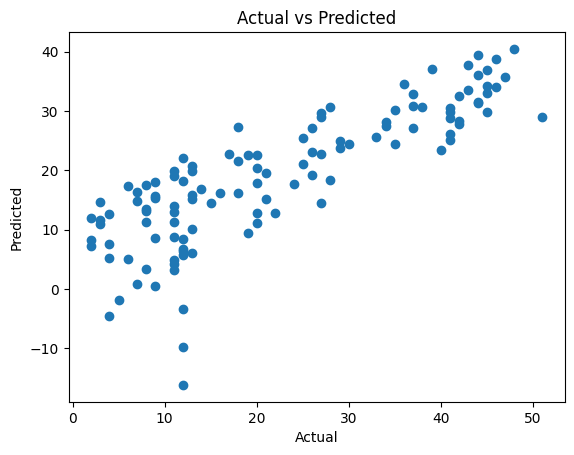

In [37]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [62]:
import pandas as pd

# Assuming y_test and y_pred are your actual and predicted values
data = {'Actual': y_test, 'Predicted': y_pred}
df = pd.DataFrame(data)

# Display the table
print(df)


     Actual  Predicted
35       29  24.890151
107      34  28.083920
127       8  17.552574
115      21  19.571575
160      39  37.121072
..      ...        ...
14       11  13.953271
29       43  37.837579
86       21  15.105902
62        8  13.236764
149      22  12.861821

[117 rows x 2 columns]


#Actual vs. Predicted

- **Actual:** This column represents the true or observed values of the 'Class' variable, which were obtained from the dataset.

- **Predicted:** This column shows the values predicted by our linear regression model for the 'Class' variable. These values are estimated by the model based on the relationships with the independent variables.

Analyzing this comparison allows us to assess the model's performance:

- When the 'Predicted' value closely matches the 'Actual' value, it indicates that the model's predictions are accurate for those observations.

- Differences between 'Predicted' and 'Actual' values represent the prediction errors. Smaller differences suggest better predictive accuracy, while larger differences indicate less accurate predictions.

- By examining the entire table, we can gain insights into how well the model generalizes to different observations. A consistent pattern of close matches between 'Predicted' and 'Actual' values across multiple rows suggests that the model is effective in estimating the 'Class' variable.

Overall, this comparison table serves as a crucial tool for evaluating the model's predictive performance, enabling us to gauge its accuracy and suitability for estimating servo system behavior based on the independent variables.

##Get Future Prediction

  Lets select a random sample from existing dataset as new value
    
    Steps to follow

    1.Extract random raw using sample function
    2.Seperate X and y
    3.Standardize x
    4.Predict
    




In [54]:
x_new =df.sample(1)

In [55]:
x_new

,Motor,Screw,Pgain,Vgain,Class
1,1,3,6,5,11


In [56]:
x_new.shape

(1, 5)

In [57]:
x_new = x_new.drop('Class',axis=1)

In [58]:
x_new

,Motor,Screw,Pgain,Vgain
1,1,3,6,5


In [59]:
x_new.shape

(1, 4)

In [60]:
y_pred_new=lr.predict(x_new)

In [61]:
y_pred_new

array([3.20808956])

##Explaination
In the our project, we have developed a linear regression model (denoted as lr) that has been trained using historical data. This model has learned the relationships between the attributes 'Motor,' 'Screw,' 'Pgain,' and 'Vgain' as independent variables and the 'Class' variable, which represents servo system behavior. To extend the utility of our model for future predictions, we utilize it to estimate the 'Class' variable for new data instances (referred to as x_new). This is achieved by invoking the predict method of our trained model, resulting in a predicted 'Class' value (stored as y_pred_new). In our specific case, the prediction is approximately 3.20808956. This process allows us to apply our model to forecast servo system behavior in real-world scenarios, contributing to our project's predictive capabilities.







##Thank You